 the number of equations 3
the coefficients
4 -1 -1
-2 6 1
-1 1 7
constants:
3
9
-6
                    Gauss Sheidel without matrix                  
Iteration 1: x = 0.75  y = 1.75  z = -1.0  total error = 1.0
Iteration 2: x = 0.9375  y = 1.8125  z = -0.9821428571428571  total error = 0.9821428571428571
Iteration 3: x = 0.9575892857142857  y = 1.8191964285714286  z = -0.9802295918367347  total error = 0.9802295918367347
Iteration 4: x = 0.9597417091836735  y = 1.8199139030612246  z = -0.9800245991253644  total error = 0.9800245991253644
Iteration 5: x = 0.959972325983965  y = 1.8199907753279883  z = -0.9800026356205748  total error = 0.9800026356205748
Iteration 6: x = 0.9599970349268534  y = 1.8199990116422846  z = -0.9800002823879187  total error = 0.9800002823879187
Iteration 7: x = 0.9599996823135915  y = 1.8199998941045303  z = -0.9800000302558484  total error = 0.9800000302558484
Iteration 8: x = 0.9599999659621705  y = 1.8199999886540568  z = -0.980000003241698  total error = 

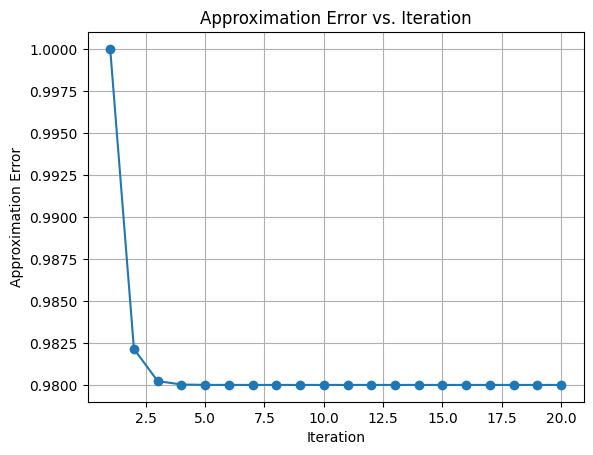

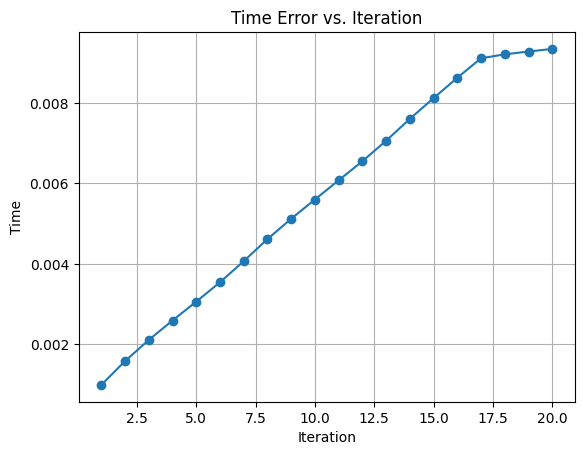

                    Gauss Sheidel with matrix                  
Value of x(k) for each iteration:  [ 0.75        1.5        -0.85714286]
Value of x(k) for each iteration:  [ 0.91071429  1.89285714 -0.96428571]
Value of x(k) for each iteration:  [ 0.98214286  1.96428571 -0.99744898]
Value of x(k) for each iteration:  [ 0.99170918  1.99362245 -0.99744898]
Value of x(k) for each iteration:  [ 0.99904337  1.99681122 -1.00027332]
Value of x(k) for each iteration:  [ 0.99913448  1.99972668 -0.99968112]
Value of x(k) for each iteration:  [ 1.00001139  1.99965835 -1.0000846 ]
Value of x(k) for each iteration:  [ 0.99989344  2.0000179  -0.99994957]
Value of x(k) for each iteration:  [ 1.00001708  1.99995607 -1.00001778]
Value of x(k) for each iteration:  [ 0.99998457  2.00000866 -0.99999128]
Value of x(k) for each iteration:  [ 1.00000434  1.99999341 -1.00000344]
Value of x(k) for each iteration:  [ 0.99999749  2.00000202 -0.99999844]
Value of x(k) for each iteration:  [ 1.0000009   1.9999989  

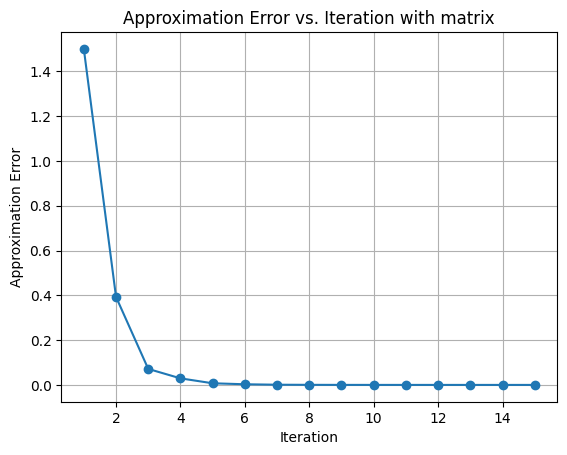

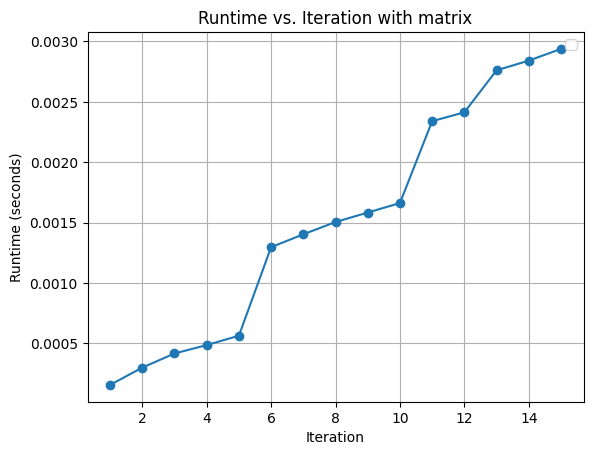

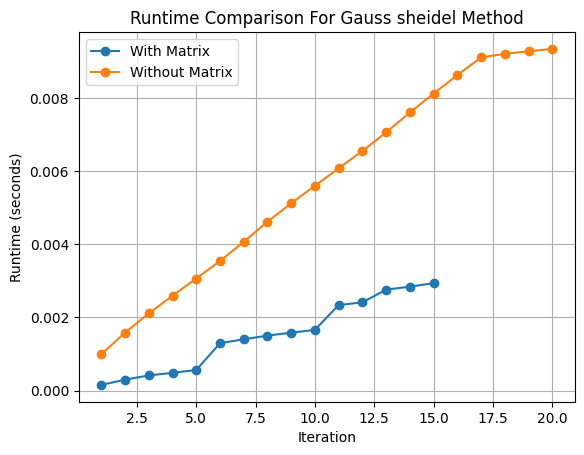

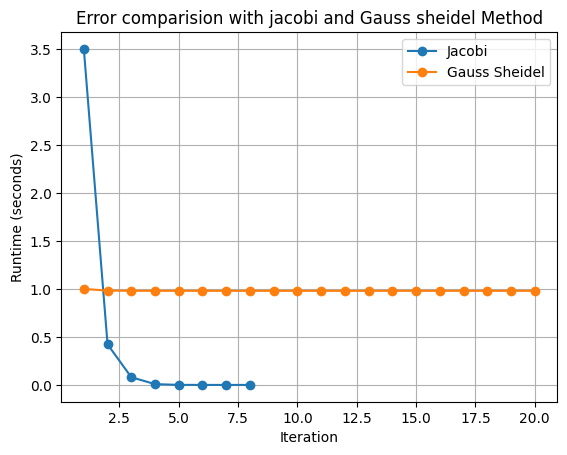

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

def jacobi_without_matrix():
    x = np.zeros(n_eq)
    num_iterations = 20

    iteration_list = []
    appx_error_list = []
    time_list = []
    start_time = time.time()
    for iteration in range(num_iterations):
        new_x = np.zeros(n_eq)
        for i in range(n_eq):
            new_x[i] = (b[i] - np.dot(A[i, :i], new_x[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

        errors = np.abs(new_x - x)
        x = new_x.copy()

        total_error = np.sum(errors)
        appx_error_list.append(total_error)
        iteration_list.append(iteration + 1)
        elapsed_time = time.time() - start_time
        time_list.append(elapsed_time)

        if total_error <= 10 ** -6:
            break


    return iteration_list, time_list,appx_error_list,iteration_list



def GaussSheidel_without_matrix():
    x = np.zeros(n_eq)
    num_iterations = 20

    iteration_list = []
    appx_error_list = []
    time_list = []
    start_time = time.time()
    print( "                    Gauss Sheidel without matrix                  ")
    for iteration in range(num_iterations):
        new_x = np.zeros(n_eq)
        for i in range(n_eq):
            new_x[i] = (b[i] - np.dot(A[i, :i], new_x[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
            errors = np.abs(new_x - x)
            x = new_x.copy()


        total_error = np.sum(errors)
        appx_error_list.append(total_error)
        iteration_list.append(iteration + 1)
        elapsed_time = time.time() - start_time
        time_list.append(elapsed_time)

        if total_error <= 10 ** -3:
            break

        print(f"Iteration {iteration + 1}: x = {x[0]}  y = {x[1]}  z = {x[2]}  total error = {total_error}")

    plt.plot(iteration_list, appx_error_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Approximation Error')
    plt.title('Approximation Error vs. Iteration')
    plt.grid()
    plt.show()

    plt.plot(iteration_list, time_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Time')
    plt.title('Time Error vs. Iteration')
    plt.grid()
    plt.show()

    return iteration_list, time_list,appx_error_list,iteration_list

def GaussSheidel_with_matrix(A, b, x0, tol=1e-6, max_iter=100):
    n_eq = len(b)
    x = x0.copy()
    error_list = []
    runtime_list = []
    elapsed_time = 0
    D = np.diag(np.diag(A))
    L = -np.tril(A, k=-1)
    U = -np.triu(A, k=1)
    iteration_list=[]
    print( "                    Gauss Sheidel with matrix                  ")

    for _ in range(max_iter):
        start_time = time.time()
        x_new = np.linalg.inv(D).dot(b + L.dot(x) + U.dot(x))
        error = np.linalg.norm(x_new - x, ord=np.inf)
        elapsed_time += time.time() - start_time
        error_list.append(error)
        runtime_list.append(elapsed_time)
        iteration_list.append(_ + 1)
        if error <= tol:
            break
        print("Value of x(k) for each iteration: ", x_new)
        x = x_new

    plt.plot(iteration_list, error_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Approximation Error')
    plt.title('Approximation Error vs. Iteration with matrix')
    plt.grid()
    plt.show()

    plt.plot(iteration_list, runtime_list, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Runtime (seconds)')
    plt.title('Runtime vs. Iteration with matrix')
    plt.legend()
    plt.grid()
    plt.show()
    return x, error_list, runtime_list



def jacobi_with_matrix(A, b, x0, tol=1e-6, max_iter=100):
    n_eq = len(b)
    x = x0.copy()
    error_list = []
    runtime_list = []
    elapsed_time = 0
    D = np.diag(np.diag(A))
    L = -np.tril(A, k=-1)
    U = -np.triu(A, k=1)
    iteration_list=[]
    for _ in range(max_iter):
        start_time = time.time()
        x_new = np.linalg.inv(D).dot(b + L.dot(x) + U.dot(x))
        error = np.linalg.norm(x_new - x, ord=np.inf)
        elapsed_time += time.time() - start_time
        error_list.append(error)
        runtime_list.append(elapsed_time)
        iteration_list.append(_ + 1)
        if error <= tol:
            break
        x = x_new

    return x, error_list, runtime_list



n_eq = int(input(" the number of equations "))

A = np.zeros((n_eq, n_eq))
b = np.zeros(n_eq)

print("the coefficients")
for i in range(n_eq):
    row = list(map(float, input().split()))
    A[i, :] = row

print("constants:")
for i in range(n_eq):
    b[i] = float(input())

xx, yy,err_j,itt_j = jacobi_without_matrix()
xs,ys,err_G,itt_G=GaussSheidel_without_matrix()

x0 = np.zeros(n_eq)
x1=np.zeros(n_eq)
tolerance = 1e-6
max_iterations = 100

solution, errors, runtimes = jacobi_with_matrix(A, b, x0, tol=tolerance, max_iter=max_iterations)
solution_s, errors_s, runtimes_s = GaussSheidel_with_matrix(A, b, x1, tol=tolerance, max_iter=max_iterations)

iteration_list = list(range(1, len(runtimes) + 1))



plt.plot(iteration_list, runtimes_s, marker='o', label='With Matrix')
plt.plot(xs, ys, marker='o', label='Without Matrix')
plt.xlabel('Iteration')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison For Gauss sheidel Method')
plt.legend()
plt.grid()
plt.show()


plt.plot(itt_j, err_j, marker='o', label='Jacobi')
plt.plot(itt_G,err_G , marker='o', label='Gauss Sheidel')
plt.xlabel('Iteration')
plt.ylabel('Runtime (seconds)')
plt.title('Error comparision with jacobi and Gauss sheidel Method')
plt.legend()
plt.grid()
plt.show()

